In [1]:
import pandas as pd

In [3]:
raw_path=''

In [4]:
olist_customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
olist_orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')
olist_categname = pd.read_csv(raw_path + 'product_category_name_translation.csv')


In [45]:
olist_categname.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [46]:
olist_geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [5]:
data = olist_orders.merge(olist_customer, on="customer_id") \
.merge(olist_order_items, on="order_id") \
.merge(olist_products , on="product_id") \
.merge(olist_categname, on="product_category_name") \
.merge(olist_order_payments, on="order_id") \
.merge(olist_sellers, on="seller_id") \
.merge(olist_order_reviews, on="order_id")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   customer_unique_id             115609 non-null  object 
 9   customer_zip_code_prefix       115609 non-null  int64  
 10  customer_city                  115609 non-null  object 
 11  customer_state                 115609 non-null  object 
 12  order_item_id                 

In [11]:
pd.read_csv('joined_data_set.csv',nrows=5).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     5 non-null      int64  
 1   order_id                       5 non-null      object 
 2   customer_id                    5 non-null      object 
 3   order_status                   5 non-null      object 
 4   order_purchase_timestamp       5 non-null      object 
 5   order_approved_at              5 non-null      object 
 6   order_delivered_carrier_date   5 non-null      object 
 7   order_delivered_customer_date  5 non-null      object 
 8   order_estimated_delivery_date  5 non-null      object 
 9   customer_unique_id             5 non-null      object 
 10  customer_zip_code_prefix       5 non-null      int64  
 11  customer_city                  5 non-null      object 
 12  customer_state                 5 non-null      object 

In [7]:
data.customer_state.unique()

array(['SP', 'SC', 'AM', 'MG', 'RJ', 'PR', 'RS', 'CE', 'BA', 'ES', 'DF',
       'GO', 'PE', 'RO', 'MS', 'PA', 'PB', 'AP', 'SE', 'AL', 'PI', 'MA',
       'MT', 'RR', 'TO', 'AC', 'RN'], dtype=object)

In [9]:
data.seller_state.unique()

array(['SP', 'SC', 'MG', 'PR', 'RS', 'RN', 'RJ', 'ES', 'DF', 'PB', 'GO',
       'PE', 'CE', 'RO', 'BA', 'MT', 'MS', 'PI', 'SE', 'AM', 'MA', 'PA',
       'AC'], dtype=object)

In [9]:
data[:10]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,37.77,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,...,44.09,9350,maua,SP,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,NaN,2017-11-08 00:00:00,2017-11-10 19:52:38
6,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,7a1de9bde89aedca8c5fbad489c5571c,1315,...,127.45,9350,maua,SP,8899ca945efd951c97107b4966289227,1,NaN,Prezados que porcaria de atendimento ao client...,2017-08-29 00:00:00,2017-08-30 02:26:02
7,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,7a1de9bde89aedca8c5fbad489c5571c,1315,...,127.45,14021,ribeirao preto,SP,8899ca945efd951c97107b4966289227,1,NaN,Prezados que porcaria de atendimento ao client...,2017-08-29 00:00:00,2017-08-30 02:26:02
8,1fa40f202d5d233b6491e976c557b822,50fd5707c28d0a64dc20d67f937dd9ba,delivered,2017-09-23 22:11:10,2017-09-23 22:25:11,2017-09-26 17:27:54,2017-10-19 21:09:21,2017-11-13 00:00:00,35c6ec4630637b3ec0da6e587f245f83,69043,...,50.05,9350,maua,SP,4b70092fc12f2328972d5ff1022d87e9,4,NaN,NaN,2017-10-20 00:00:00,2017-10-23 04:13:41
9,41c045db2d1876be9f05cf4a787693b2,a286f46d6e54cc0179bbb0ee07b0df5e,delivered,2017-08-16 14:06:30,2017-08-16 14:55:20,2017-08-18 15:41:40,2017-08-21 15:05:13,2017-08-29 00:00:00,4e4fa2b85379e9db6dc59f873f0a9748,5640,...,32.68,9350,maua,SP,b9e086024ceb0234e5950016497a4928,5,NaN,NaN,2017-08-22 00:00:00,2017-08-26 02:31:53


In [10]:
for  i in data.columns:
    if data[i].nunique() < 100:
        print(data[i].value_counts())

delivered      113210
shipped          1138
canceled          536
invoiced          358
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64
SP    48797
RJ    14987
MG    13429
RS     6413
PR     5879
SC     4218
BA     3942
DF     2449
GO     2359
ES     2300
PE     1851
CE     1527
MT     1106
PA     1081
MS      845
MA      832
PB      619
PI      561
RN      560
AL      455
SE      393
TO      333
RO      279
AM      168
AC       93
AP       83
RR       50
Name: customer_state, dtype: int64
1     101340
2      10055
3       2326
4        969
5        458
6        256
7         60
8         35
9         28
10        25
11        17
12        12
13         7
14         6
15         4
16         2
17         2
18         2
19         2
20         2
21         1
Name: order_item_id, dtype: int64
cama_mesa_banho                  11847
beleza_saude                      9944
esporte_lazer                     8942
moveis_decoracao              

In [11]:
data.review_comment_title.value_counts()[:10]

Recomendo          489
recomendo          401
Bom                331
super recomendo    310
Excelente          293
Muito bom          279
Ótimo              267
Super recomendo    252
Ótimo              234
Otimo              201
Name: review_comment_title, dtype: int64

In [12]:
data.order_status.value_counts()

delivered      113210
shipped          1138
canceled          536
invoiced          358
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64

In [13]:
data.product_category_name_english.value_counts()

bed_bath_table               11847
health_beauty                 9944
sports_leisure                8942
furniture_decor               8743
computers_accessories         8105
                             ...  
arts_and_craftmanship           24
la_cuisine                      15
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

In [14]:
data.product_category_name.value_counts()

cama_mesa_banho                  11847
beleza_saude                      9944
esporte_lazer                     8942
moveis_decoracao                  8743
informatica_acessorios            8105
                                 ...  
artes_e_artesanato                  24
la_cuisine                          15
cds_dvds_musicais                   14
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: product_category_name, Length: 71, dtype: int64

In [15]:
data.review_comment_message.nunique()

35176

In [16]:
data['review_comment_message'].nunique()

35176

In [18]:
# from googletrans import Translator

# # Create a sample DataFrame
# # data = {'Review': ["Bonjour, comment ça va?", "Ich liebe diesen Film", "Hola, ¿cómo estás?"]}
# # df = pd.DataFrame(data)

# # Function to translate a text using Googletrans
# def translate_text(text, dest='en'):
#     translator = Translator()
#     translated_text = translator.translate(text, dest=dest)
#     return translated_text.text

# # Apply the translation function to the 'Review' column
# data['Translated_Review'] = data['review_comment_message'].apply(translate_text)

# # Display the DataFrame with translated reviews



In [19]:
for i in data.columns:
    if data[i].dtype != 'object':
        print(i,' > ',data[i].skew())

customer_zip_code_prefix  >  0.7843642183811036
order_item_id  >  7.19520595525071
price  >  7.615418216518572
freight_value  >  5.560212760479062
product_name_lenght  >  -0.905419685477803
product_description_lenght  >  2.0115330379399667
product_photos_qty  >  1.9108679719349142
product_weight_g  >  3.580649801661388
product_length_cm  >  1.7425098719945324
product_height_cm  >  2.2431210608437415
product_width_cm  >  1.707217058139488
payment_sequential  >  16.00176825924981
payment_installments  >  1.6181717207743274
payment_value  >  14.306544229593069
seller_zip_code_prefix  >  1.5480429933544555
review_score  >  -1.275224717627826


In [20]:
from scipy.stats import shapiro

In [21]:
for i in data.columns:
    if data[i].dtype != 'object':
        print(i,' > ', 1 if shapiro(data[i]).pvalue > 0.05 else 0 )

customer_zip_code_prefix  >  0
order_item_id  >  0
price  >  0
freight_value  >  0
product_name_lenght  >  0
product_description_lenght  >  0
product_photos_qty  >  0
product_weight_g  >  1
product_length_cm  >  1
product_height_cm  >  1
product_width_cm  >  1
payment_sequential  >  0
payment_installments  >  0
payment_value  >  0
seller_zip_code_prefix  >  0
review_score  >  0


/home/kar911/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [22]:
import numpy as np

<AxesSubplot: >

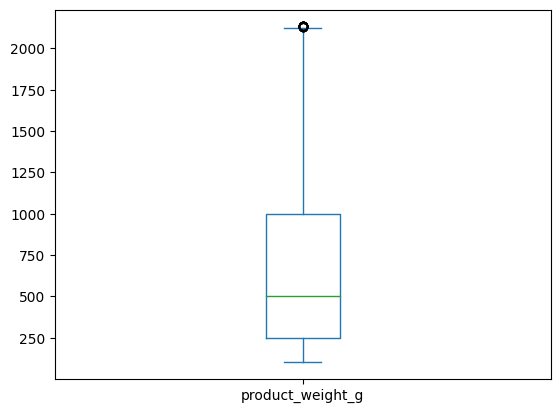

In [23]:
da=data.product_weight_g
da = da[da < da.quantile(.78)]
da = da[da > da.quantile(.05)]

da.plot(kind='box')

<AxesSubplot: >

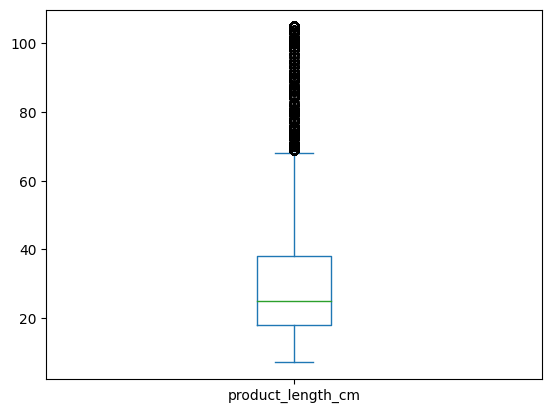

In [24]:
data.product_length_cm.plot(kind='box')

In [25]:
for i in data.columns:
    if data[i].nunique() < 10:
        print(i,' > ',data[i].nunique())

order_status  >  7
payment_type  >  4
review_score  >  5


In [26]:
dd2=pd.crosstab(data.order_status,data.payment_type)

In [27]:
dd1=pd.crosstab(data.review_score,data.payment_type)

In [28]:
dd3=pd.crosstab(data.review_score,data.order_status)

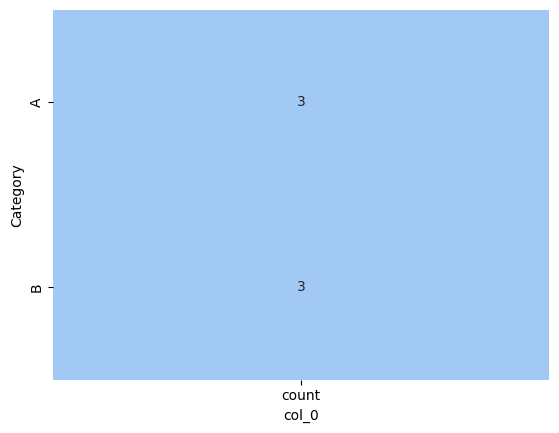

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
        'Value': [10, 20, 30, 40, 50, 60]}
df = pd.DataFrame(data)

# Create a crosstab
cross_tab = pd.crosstab(df['Category'], columns='count')

# Set the color palette
palette = sns.color_palette("pastel")

# Create a heatmap using sns.heatmap
sns.heatmap(cross_tab, annot=True, cmap=palette, cbar=False, fmt='d')

# Show the plot
plt.show()


In [34]:
# import seaborn as sns
# cm = sns.light_palette("green", as_cmap=True)
# cm=sns.choose_cubehelix_palette()
# cm[0]
# dd1.style.background_gradient(cmap=cm.pop())

In [36]:
dd2.style.background_gradient(cmap='cool')

payment_type,boleto,credit_card,debit_card,voucher
order_status,,,,
approved,0,3,0,0
canceled,92,411,6,27
delivered,22029,83536,1623,6022
invoiced,88,250,6,14
processing,93,240,2,22
shipped,208,831,22,77
unavailable,0,7,0,0


In [37]:
dd3.style.background_gradient(cmap='cool')

order_status,approved,canceled,delivered,invoiced,processing,shipped,unavailable
review_score,,,,,,,
1,2,411,12862,259,296,710,6
2,0,34,3840,33,30,83,0
3,0,32,9533,18,12,123,0
4,1,14,21816,20,7,93,0
5,0,45,65159,28,12,129,1


<AxesSubplot: >

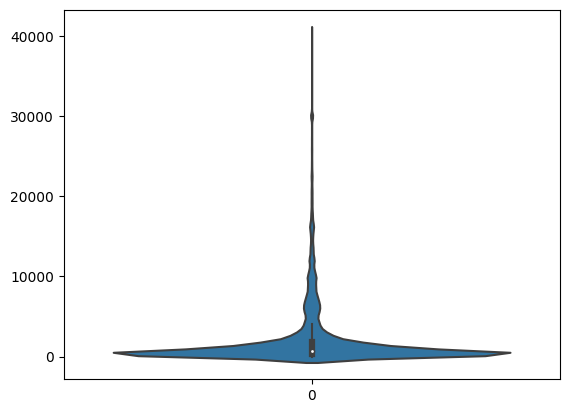

In [49]:
sns.violinplot(data.product_weight_g)

<AxesSubplot: >

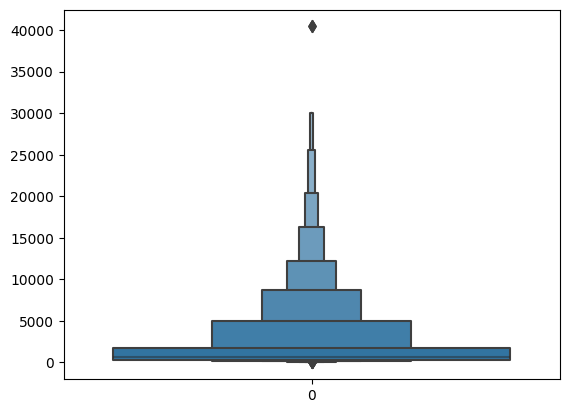

In [50]:
sns.boxenplot(data.product_weight_g)

<AxesSubplot: >

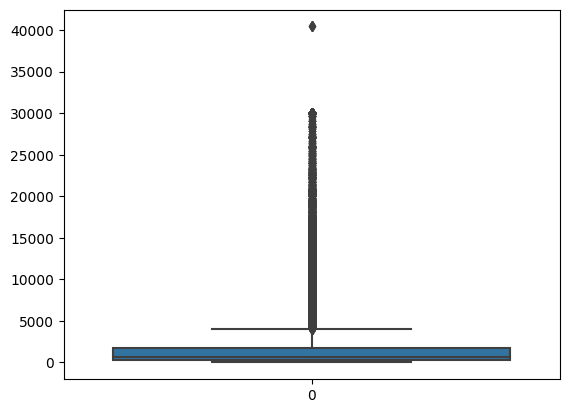

In [51]:
sns.boxplot(data.product_weight_g)

In [52]:
data.describe(include=['O'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,...,product_category_name,product_category_name_english,payment_type,seller_city,seller_state,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,115609,115609,115609,115609,115595,114414,113209,115609,115609,115609,...,115609,115609,115609,115609,115609,115609,13801,48906,115609,115609
unique,96516,96516,7,95989,88332,79241,93702,449,93396,4093,...,71,71,4,604,23,96319,4477,35176,632,96163
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,sao paulo,...,cama_mesa_banho,bed_bath_table,credit_card,sao paulo,SP,eef5dbca8d37dfce6db7d7b16dd0525e,Recomendo,Muito bom,2017-12-19 00:00:00,2017-08-17 22:17:55
freq,63,63,113210,63,63,63,63,649,75,18267,...,11847,11847,85278,28811,82417,63,489,253,531,63


In [53]:
data.describe(include=['int'])

,customer_zip_code_prefix,order_item_id,payment_sequential,payment_installments,seller_zip_code_prefix,review_score
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,1.194535,1.093747,2.946233,24515.713958,4.034409
std,29841.671732,0.685926,0.729849,2.781087,27636.640968,1.385584
min,1003.000000,1.000000,1.000000,0.000000,1001.000000,1.000000
25%,11310.000000,1.000000,1.000000,1.000000,6429.000000,4.000000
50%,24241.000000,1.000000,1.000000,2.000000,13660.000000,5.000000
75%,58745.000000,1.000000,1.000000,4.000000,28605.000000,5.000000
max,99980.000000,21.000000,29.000000,24.000000,99730.000000,5.000000


In [54]:
data.describe(include=['float'])

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000
mean,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,172.387379
std,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,265.873969
min,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,0.000000
25%,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,60.870000
50%,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,108.050000
75%,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,189.480000
max,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,13664.080000


<AxesSubplot: >

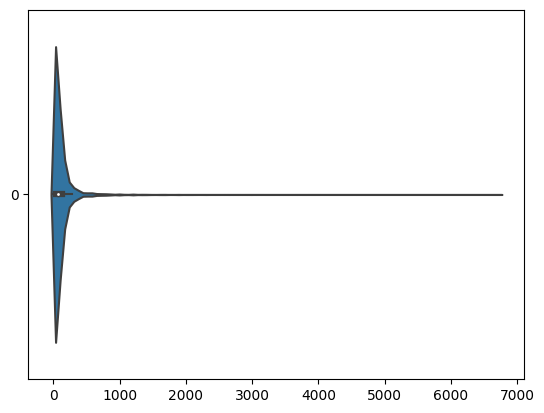

In [55]:
sns.violinplot(data.price,orient='h')

In [56]:
import seaborn as sn

In [74]:
import scipy.stats as st

In [75]:
def all_plot():
    for i in data.columns:
        if data[i].dtype != 'object':
            %matplotlib qt

            print()
            try:
                q1,q3=data[i].quantile([0.25,0.75])
                IQR=q3-q1
                low_lim = q1 - 1.5 * IQR
                up_lim = q3 + 1.5 * IQR
                out_count= data[i][~(data[i] >low_lim) & ~(data[i] < up_lim)].shape
                print(i)
                print('outlier_count > ',out_count)
                in_count= data[i][(data[i] >low_lim) & (data[i] < up_lim)].shape
                print('inlier_count > ',in_count)
                print('skew',data[i][(data[i] >low_lim) & (data[i] < up_lim)].skew())
                if data[i][(data[i] >low_lim) & (data[i] < up_lim)].shape[0] > 2: 
                    print('kurtosis',st.kurtosis(data[i][(data[i] >low_lim) & (data[i] < up_lim)]))
                    print('shapiro_willk',st.shapiro(data[i][(data[i] >low_lim) & (data[i] < up_lim)]))
                    yield sn.boxenplot(data[i],orient='h')
            except Exception as e:
                print(e)

In [76]:
new=all_plot()

In [77]:
sn.boxenplot(data['payment_installments'],orient='h')

<AxesSubplot: >

In [ ]:
next(new)

In [64]:
def all_plot():
    for i in data.columns:
        if data[i].dtype != 'object':
            %matplotlib qt

            print()
            try:
                q1,q3=data[i].quantile([0.25,0.75])
                IQR=q3-q1
                low_lim = q1 - 1.5 * IQR
                up_lim = q3 + 1.5 * IQR
                out_count= data[i][~(data[i] >low_lim) & ~(data[i] < up_lim)].shape
                print(i)
                print('outlier_count > ',out_count)
                in_count= data[i][(data[i] >low_lim) & (data[i] < up_lim)].shape
                print('inlier_count > ',in_count)
                print('skew',data[i][(data[i] >low_lim) & (data[i] < up_lim)].skew())
                if data[i][(data[i] >low_lim) & (data[i] < up_lim)].shape[0] > 2: 
                    print('kurtosis',st.kurtosis(data[i][(data[i] >low_lim) & (data[i] < up_lim)]))
                    print('shapiro_willk',st.shapiro(data[i][(data[i] >low_lim) & (data[i] < up_lim)]))
                yield sn.violinplot(x=data[i][(data[i] >low_lim) & (data[i] < up_lim)],orient='h')
            except Exception as e:
                print(e)

In [65]:

new=all_plot()

In [82]:
next(new)

StopIteration: 